In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random


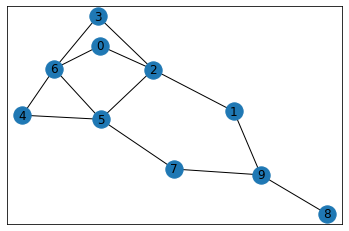

In [ ]:
edges=[(6,5),(1,2),(4,5),(2,5),(3,2),(6,3),(2,3),(7,5),(5,7),(9,1),
       (8,9),(9,7),(6,5),(6,0),(0,2),(4,6)]
g=nx.Graph()
g.add_edges_from(edges)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g,pos)
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_labels(g,pos)
plt.show()

#random graph 


In [ ]:
#shortest path from 0 to 1
#for all edges from node 9 reward=100 (7 to 9,1 to 9,8 to 9) in our random graph

R=np.matrix(np.zeros(shape=(10,10)))
for x in g[9]:
  R[x,9]=100

#Possible actions based on our graph are set=0
#Impossible actioons=-100
Q=np.matrix(np.zeros(shape=(10,10)))
Q-=100
for node in g.nodes:
  for x in g[node]:
    Q[node,x]=0
    Q[x,node]=0

import pandas as pd


In [ ]:
pd.DataFrame(R)


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9
0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0
2,0.0,0.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0
4,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
5,-100.0,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0
6,0.0,-100.0,-100.0,0.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,0.0
8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0


In [ ]:
#Function which takes a starting node and returns the next node
def next_number(start,er):
  random_value=random.uniform[0,1] #random no between 0 & 1
  if random_value<er:  #if random action is below threshold, it chooses next action randomly
    sample=G[start]  
  else:
    sample=np.where(Q[start,]==np.max(Q[start,]))[1]
  next_node=int(np.random.choice(sample,1))
  return next_node



In [ ]:
#Function to update the A table based on action
def Qupdate(node1,node2,lr,discount):
  max_index=np.where(Q[node2,]==np.max(Q[node2,]))[1]
  if max_index.shape[0]>1:
    max_index=int(np.random.choice(max_index,size=1))
  else:
    max_index=int(max_index)
  max_value=Q[node2,max_index]
  Q[node1,node2]=int((1-lr)*Q[node1,node2]+lr*(R[node1,node2]+discount*max_value))

In [ ]:
#improve Q-values by starting at random nodes and making 50000 walks
def learn(er,lr,discount):
  for i in range(50000):
    start=np.random.randint(0,10)
    next_node=next_number(start,er)
    Qupdate(start,next_node,lr,discount)

learn(0.5,0.8,0.8) #exploration rate,learnng rate,discount factor

In [ ]:
#shortest path between 0 and 9, by choosing highest Q-value from Q matrix when deciding an action:
def shortest_path(begin,end):
  path=[begin]
  next_node=np.argmax(Q[begin,])
  path.append(next_node)
  while next_node!=end:
    next_node=np.argmax(Q[next_node,])
    path.append(next_node)
  return path

In [ ]:
shortest_path(0,9)